In [49]:
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
import sys
import struct
from typing import List

In [73]:
#The implementation of LZ77
class LZ77:
    """
    This class represent LZ77 algorithm.
    """
    def __init__(self, buffer_size: int) -> None:
        """
        The constructor for a class.
        """
        self.buffer_size = buffer_size

    def encode(self, input_str: str) -> List[tuple]:
        """
        This method encode string.
        """
        output = [] # list to store result's
        pos = 0 # current position
        while pos < len(input_str): # iterate the whole string
            best_len = 0
            best_offset = 0
            for offset in range(1, self.buffer_size+1): # check all offsets
                if pos - offset < 0: # breaking if have gone too far(outside the buffer)
                    break
                i = pos - offset
                j = pos
                length = 0
                while j < len(input_str) and input_str[i] == input_str[j] and length < offset:
                    length += 1
                    i += 1
                    j += 1
                if length > best_len: # checking if our current length is
                    # better than that one, which we already have
                    best_len = length
                    best_offset = offset
            if best_len > 0: # if a match, add it to the result
                #(first_param - the best offset, and the second one-how much will repeat it)
                try:
                    output.append((best_offset, best_len, input_str[pos + best_len]))
                    pos += best_len + 1 # adding best_len
                    # to position to continue loop without repeat
                except IndexError:
                    output.append((best_offset, best_len, ''))
                    pos += best_len + 1
                    continue
            else: # if we don't have a match, adding 0 as the first element
               # of the tuple and an ord representaion of the letter
                try:
                    output.append((0, 0, input_str[pos]))
                    pos += 1
                except IndexError:
                    output.append((0, 0, ''))
                    pos += 1
        return output

    def decode(self, encoded_output: List[tuple]) -> str:
        """
        This methode decode encoding into string.
        """
        result = ''
        for elem in encoded_output:
            if elem[1] == 0:
                result += elem[2]
            else:
                start_index = len(result) - elem[0]
                for i in range(elem[1]):
                    result += result[start_index+i]
                result += elem[2]
        return result

    def compress_lz77_to_bytes(self, lz77_result: List[tuple], file_to_write: str) -> None:
        """
        This method write compressed lz77 in file.
        """
        with open(file_to_write, 'wb') as file:
            for triple in lz77_result:
                if triple[2]:
                    next_char = triple[2]
                else:
                    next_char = '\0'
                try:
                    packed_triple = struct.pack('<HBB', triple[0], triple[1], ord(next_char))
                    file.write(packed_triple)
                except Exception:
                    continue


In [28]:
# function, that checks LZ77 algorithm
def check_lz77(buffer_size, text_list):
    time_taken = []
    length = []
    for i in text_list:
        with open(i, mode='r', encoding='utf-8') as file:
            res = '\n'.join([i.strip() for i in file.readlines()])
            length.append(len(res))
            start = time.time()
            lz77 = LZ77(buffer_size)
            lz77.encode(res)
            end = time.time()
            compression_time = end - start
            time_taken.append(compression_time)
    plt.figure(figsize=(10,6))
    plt.legend('LZ77 encoding time')
    plt.xlabel('Length of text')
    plt.ylabel('Time taken')
    x = length
    y = time_taken
    plt.plot(x, y)


In [32]:
def check_compression(path_file):
    with open(path_file, mode='r', encoding='utf-8') as file:
        res = '\n'.join([i.strip() for i in file.readlines()])
        lz = LZ77(5)
        res = lz.encode(res)
        compressed = lz.compress_result(res)
        lz.write_to_file('test.txt', compressed)

In [93]:
def ch(path):
    with open(path, mode='r', encoding='utf-8', errors="ignore") as file:
        return ''.join([x for x in file.readlines()])

In [107]:
lz77 = LZ77(5)
print(f"text size: {sys.getsizeof(ch('result_the_biggest.txt'))}")
lz77.compress_lz77_to_bytes(lz77.encode(ch('result_the_biggest.txt')), 'textsize.txt')
print(f"text size: {sys.getsizeof(ch('textsize.txt'))}")

print(f"text size: {sys.getsizeof(ch('lettes.txt'))}")
lz77.compress_lz77_to_bytes(lz77.encode(ch('lettes.txt')), 'textsize.txt')
print(f"text size: {sys.getsizeof(ch('textsize.txt'))}")


text size: 7893484
text size: 12235755
text size: 16321808
text size: 13253821


As we can see, LZ77 works better if there is a text, with symbols or characters, which repeats many time. From the other hand, if the text has a lot of unique elements, it works worse.

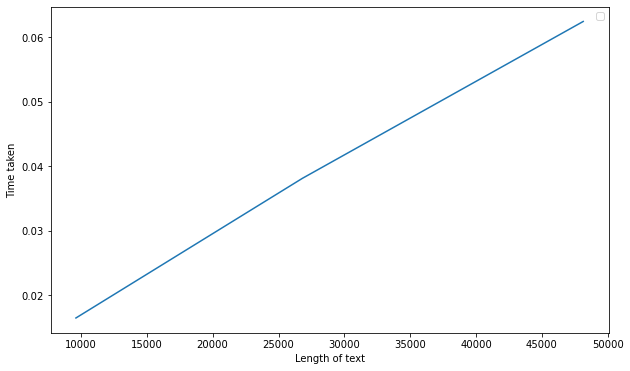

In [34]:
# checking the algorithm on three files of different length and size buffer 5
check_lz77(5, ['result_smaller.txt', 'result.txt', 'result_big.txt'])

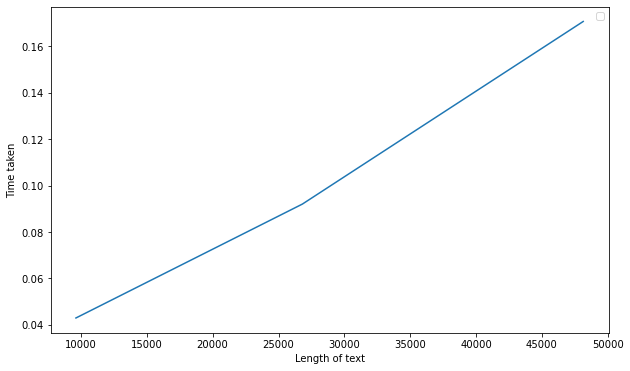

In [35]:
# checking the algorithm on three files of different length and size buffer 25
check_lz77(25, ['result_smaller.txt', 'result.txt', 'result_big.txt'])

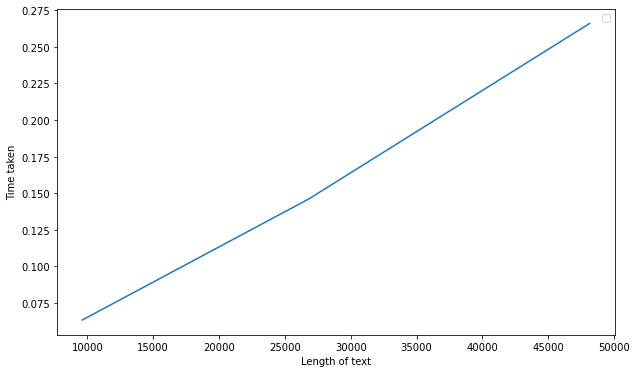

In [36]:
# checking the algorithm on three files of different length and size buffer 50
check_lz77(50, ['result_smaller.txt', 'result.txt', 'result_big.txt'])

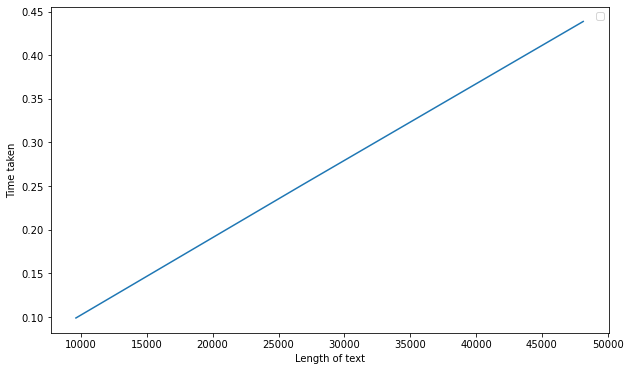

In [37]:
# checking the algorithm on three files of different length and size buffer 100
check_lz77(100, ['result_smaller.txt', 'result.txt', 'result_big.txt'])

Algorithm lz77 works on the basis of a template search, which allows to reduce the amount of data that needs to be stored. It is commonly used to compress text files such as HTML, XML, CSS, and audio and video files. It's more useful to use LZ77 if we have data, that represent simple and repeated content. Also, using LZ77 is efficient for low entropy files where a significant number of shared sequences can be found.

In [ ]:
lz = LZ77(10)
message = "The fluffy unicorn danced on top of the rainbow while juggling pineapples and singing opera in Chinese. Suddenly, a herd of purple elephants wearing tutus arrived and started tap-dancing to the beat of a salsa song played by a group of penguins wearing bow ties. In the midst of all the chaos, a giant spaghetti monster appeared and started playing the harmonica, creating a cacophony of sounds that made the nearby trees grow eyes and start speaking in Swahili. Just when you thought it couldn't get any weirder, a group of aliens arrived in a flying saucer and started breakdancing to the rhythm of a techno tune that only they could hear. The end."
print(message == lz.decode(lz.encode(message)))